# 整理数据

In [1]:
target = "KN"

In [2]:
import os
import json
data_file_dir = f"/data/yltang/simulated_data_1/data_2025_03/{target}/data"
data_file_name = []
for root, dirs, files in os.walk(data_file_dir, topdown=False):
    data_file_name.append(files)

In [3]:
#定义一个将数据打乱的函数
def data_shuffle(data, redshift):
    index = list(range(len(data)))
    np.random.shuffle(index)
    shuffle_data = []
    shuffle_redshift = []
    for i in index:
        shuffle_data.append(data[i])
        shuffle_redshift.append(redshift[i])
        
    return shuffle_data, shuffle_redshift

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_file_name[0]

['KN_1.json', 'KN_2.json', 'KN_3.json', 'KN_4.json']

In [6]:
data_file_name =[
'KN_1.json', 'KN_2.json', 'KN_3.json', 'KN_4.json'
 ]

In [7]:
redshift_file_dir = f"/data/yltang/simulated_data_1/data_2025_03/{target}/redshift"
redshift_file_name = []
for root, dirs, files in os.walk(redshift_file_dir, topdown=False):
    redshift_file_name.append(files)

In [8]:
redshift_file_name[1]

['KN_redshift_1.json',
 'KN_redshift_4.json',
 'KN_redshift_3.json',
 'KN_redshift_2.json']

In [9]:
redshift_file_name =[
'KN_redshift_1.json',
 'KN_redshift_2.json',
 'KN_redshift_3.json',
 'KN_redshift_4.json'
]

In [10]:
def load_json_file(json_file):
    with open(json_file, "r") as file:
        data = json.load(file)
    return data

In [11]:
redshift_list = []
data_list = [] 
for i in redshift_file_name[:]:
    print(i)
    redshift = load_json_file(redshift_file_dir+"/"+i)
    redshift_list.append(redshift)

for i in data_file_name[:]:
    data = load_json_file(data_file_dir+"/"+i)
    data_list.append(data)

KN_redshift_1.json
KN_redshift_2.json
KN_redshift_3.json
KN_redshift_4.json


In [12]:
len(redshift_list), len(data_list)

(4, 4)

In [13]:
len(data_list[0])

1187

In [14]:
# 合并json文件
data = data_list[0]
for i in range(len(data_list)-1):
    data = data + data_list[i+1]

In [15]:
redshift_info = redshift_list[0]
for i in range(len(redshift_list)-1):
    redshift_info = redshift_info + redshift_list[i+1]

In [16]:
print(len(data), len(redshift_info))

4654 4654


In [17]:
type(data), type(redshift_info)

(list, list)

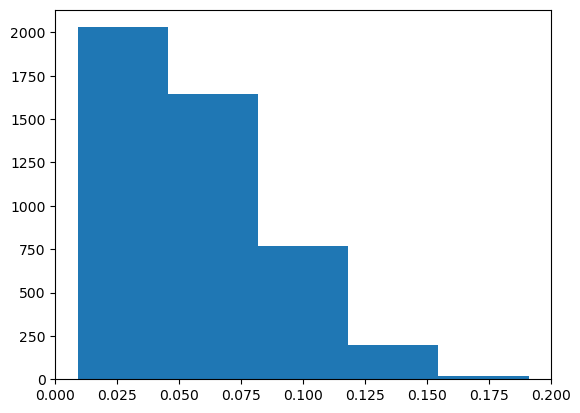

In [18]:
import matplotlib.pyplot as plt
plt.hist(redshift_info, bins=5)
plt.show()

In [49]:
#直接保存全部文件
import json
# 将三个数据集和对应的红移参数保存到JSON文件
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/total_data/data/{target}_data.json', 'w') as file:
    json.dump(unlabeled_data_list, file)
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/total_data/redshift/{target}_redshift.json', 'w') as file:
    json.dump(unlabeled_redshift_list, file)

In [37]:
#定义一个以红移为参数的概率采样函数
def redshift_based_sampler(redshift, bin_size):
    #按照红移的分bin计算指定的红移位于哪个bin
    z_equi = redshift // bin_size #因为要小于0.5，所以加上2
    #采样概率是一个反比函数
    #z_posibility = 1/z_equi
    z_posibility = z_equi/10 #对KN进行

    #按照bin区间对应的概率选择是否选取该样本
    sampling_posibility = np.random.rand()
    if sampling_posibility >= z_posibility:
        return True
    else:
        return False

In [38]:
max(redshift_info), min(redshift_info)

(0.19109, 0.00906)

In [46]:
#开始采样
labeled_data_list = [] #创建一个labeled_list来收集采样到的数据
labeled_redshift_list = []

unlabeled_data_list = [] #创建另一个列表来收集未采样到的数据
unlabeled_redshift_list = []

bin_size = (max(redshift_info)-min(redshift_info))/10 #默认是将红移区间分成10个bin
for i, data_ in enumerate(data):
    redshift = redshift_info[i]
    is_selected = redshift_based_sampler(redshift=redshift, bin_size=bin_size)
    if is_selected:
        unlabeled_data_list.append(data_)
        unlabeled_redshift_list.append(redshift_info[i])
    else:
        labeled_data_list.append(data_)
        labeled_redshift_list.append(redshift_info[i])


len(labeled_data_list), len(labeled_redshift_list), len(unlabeled_redshift_list), len(unlabeled_data_list)

(1137, 1137, 3517, 3517)

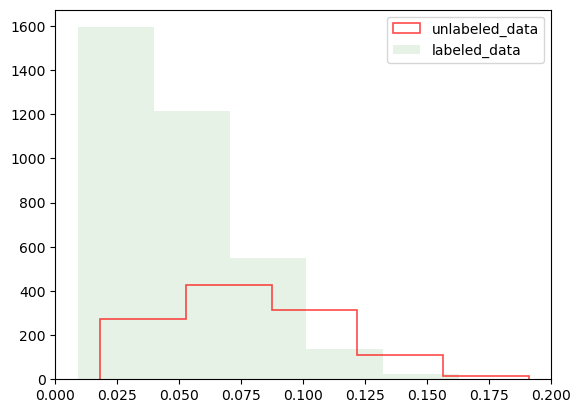

In [48]:
# 绘图比较三个数据集之间的红移分布差别
plt.hist(labeled_redshift_list, bins=5, histtype="step", linewidth=1.2, color='r', alpha=0.7, label="unlabeled_data")
plt.hist(unlabeled_redshift_list, bins=5, linewidth=1.2, alpha=0.1,color="g", label="labeled_data" )

plt.legend()
#plt.savefig("original_light_curve.jpg",bbox_inches='tight')
plt.show()

In [44]:
import json
# 将三个数据集和对应的红移参数保存到JSON文件
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/train_data/data/{target}_train_data.json', 'w') as file:
    json.dump(labeled_data_list, file)
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/train_data/redshift/{target}_train_redshift.json', 'w') as file:
    json.dump(labeled_redshift_list, file)

In [45]:
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/test_data/data/{target}_test_data.json', 'w') as file:
    json.dump(unlabeled_data_list, file)
with open(f'/home/yltang/data/simulated_data_1/data_2025_03/test_data/redshift/{target}_test_redshift.json', 'w') as file:
    json.dump(unlabeled_redshift_list, file)

# 测试GP fit

In [28]:
index_list = list(range(len(data)))

In [29]:
sample = 0

In [30]:
sample += 1

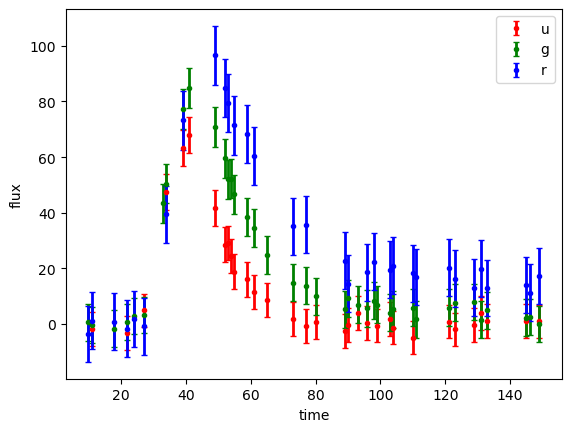

In [31]:
fmt_1 = ['.r','.g','.b','.k','.y','.m']
fmt_2 = ['dr','dg','db','dk','dy','dm']
color = ['r','g','b','k','y','m']
label = ['u','g','r','i','z','w']
data_sample = data[sample]
for i in range(3):
    mjd_ = data_sample[0][i]
    flux_ = data_sample[1][i]
    flux_err_ = data_sample[2][i]
    
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt_1[i], elinewidth=2, capsize=2,label=label[i])
    plt.legend()
    #plt.xlim(min(mjd),max(mjd))
    plt.xlabel("time")
    plt.ylabel("flux")

In [32]:
# gp 拟合
gp_parameter_list = []
sample_size = len(data)

import sys
import numpy as np
from tqdm import tqdm
sys.path.append("/home/yltang/data/lc_processor/python_code/tools")
from make_dense_light_curve_effective import make_dense_light_curve
make_dense = make_dense_light_curve(light_curve=None)

In [33]:
lc_list = []
concated_lc_list = []
fit_fail_list = []
with tqdm(total=sample_size*10, desc='Processing...', leave=True, ncols=100, unit='B', unit_scale=True) as pbar:
    for sample in range(len(data)):
        mjd = []
        flux = []
        flux_err = []
        for i in range(3):
            mjd_ = data[sample][0][i]
            flux_ = data[sample][1][i]
            flux_err_ = data[sample][2][i]
            mjd_ = np.array(mjd_)
            flux_ = np.array(flux_)
            flux_err_ = np.array(flux_err_)
            mjd.append(mjd_)
            flux.append(flux_)
            flux_err.append(flux_err_)
        
        lc = [mjd, flux, flux_err]
        concatnet_lc = make_dense.concatenate_lc(light_curve_info=lc)
        try:
            gp_ = make_dense.fit_gps(concat_lc=concatnet_lc)
            lc_list.append(lc)
            concated_lc_list.append(concatnet_lc)
            gp_parameter_list.append(gp_)
        except:
            fit_fail_list.append(sample)
            print(f"GP failed to fit this data: index{sample}")
            
        pbar.update(10)

Processing...: 100%|█████████████████████████████████████████████| 6.20k/6.20k [00:16<00:00, 380B/s]


In [34]:
len(lc_list)

620

In [35]:
def interpolation(lc):
    mjd_list = []
    flux_list = []
    flux_err_list = []
    weight = []
    for band in range(3):
        x_pred = np.linspace(min(time), max(time), int(max(time)-min(time))+1)
        x_pred = np.vstack([x_pred,np.ones(x_pred.shape)*central_wave_length[band]])
        pred, pred_var = gp_.predict(fluxes, x_pred.T, return_var=True)
        x_pred_ = x_pred[0,:]
        #print(x_pred_)

        mjd = x_pred_
        flux = pred
        flux_err = np.sqrt(pred_var)
        weight_pre_band = list(np.zeros(shape=(len(mjd),)))
        
        for i, generate_mjd in enumerate(mjd):
            for j, real_mjd in enumerate(lc[0][band]):
                if generate_mjd == real_mjd:
                    #print(generate_mjd, real_mjd)
                    flux[i] = lc[1][band][j]
                    flux_err[i] = lc[2][band][j]
                    weight_pre_band[i] = 1.
                    #print(weight_pre_band[i])
                    break
                    
        #print(weight_pre_band)       
        mjd_list.append(mjd)
        flux_list.append(flux)
        flux_err_list.append(flux_err)
        weight.append(weight_pre_band)

    interpolated_data = [mjd_list, flux_list, flux_err_list]
    return interpolated_data, weight

In [36]:
central_wave_length = [3570.0,4767.0,6215.0,7545.0,8708.0,10040.0]
central_wave_length = np.array(central_wave_length)

In [37]:
interpolated_data_list = []
weight_list = []
with tqdm(total=sample_size*10, desc='Processing...', leave=True, ncols=100, unit='B', unit_scale=True) as pbar:
    for sample in range(len(lc_list)):
        lc = lc_list[sample]
        concatnet_lc = concated_lc_list[sample]
        gp_ = gp_parameter_list[sample]
        time = concatnet_lc[0]
        fluxes = concatnet_lc[1]
        flux_errs = concatnet_lc[2]
        filters = concatnet_lc[3]
        try:
            interpolated_data, weight = interpolation(lc=lc)
            interpolated_data_list.append(interpolated_data)
            weight_list.append(weight)
        except:
            fit_fail_list.append(sample)
            print(f"GP failed to fit this data: index{sample}")
        pbar.update(10)

Processing...: 100%|███████████████████████████████████████████| 6.20k/6.20k [00:03<00:00, 1.80kB/s]


In [38]:
len(interpolated_data_list)

620

In [39]:
selected_index = []
for index in index_list:
    if index not in fit_fail_list:
        selected_index.append(index)

In [40]:
len(selected_index)

620

In [41]:
selected_data_list = []
selected_redshift_list = []
for i in selected_index:
    selected_data_list.append(data[i])
    selected_redshift_list.append(redshift_info[i])
len(selected_data_list), len(selected_redshift_list)

(620, 620)

In [45]:
sample = 0

In [46]:
sample += 1

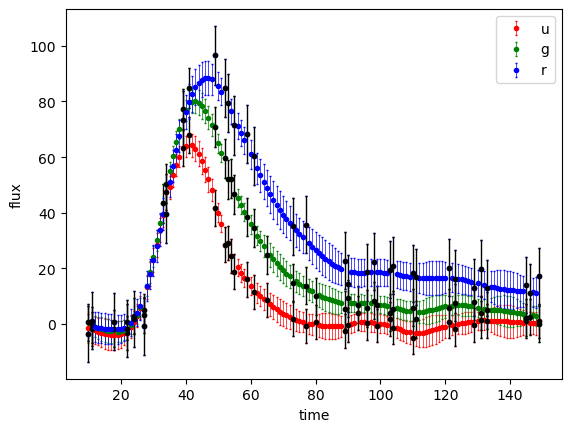

In [47]:
for i in range(3):
    mjd_ = interpolated_data_list[sample][0][i]
    flux_ = interpolated_data_list[sample][1][i]
    flux_err_ = interpolated_data_list[sample][2][i]
    
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt_1[i], elinewidth=0.5, capsize=0.5,label=label[i])
    plt.errorbar(x=data[sample][0][i], y=data[sample][1][i], yerr=data[sample][2][i], fmt=".k", elinewidth=1, capsize=1)
    plt.legend()
    #plt.xlim(min(mjd),max(mjd))
    plt.xlabel("time")
    plt.ylabel("flux")

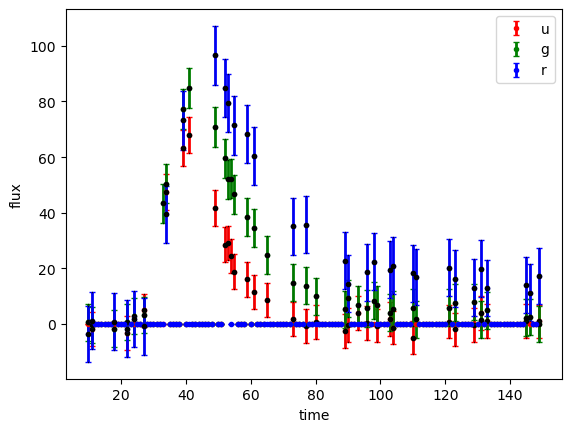

In [48]:
for i in range(3):
    mjd_ = interpolated_data_list[sample][0][i]
    flux_ = interpolated_data_list[sample][1][i]
    flux_err_ = interpolated_data_list[sample][2][i]
    flux_ = flux_ * weight_list[sample][i]
    flux_err_ = flux_err_ * weight_list[sample][i]
    
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt_1[i], elinewidth=2, capsize=2,label=label[i])
    plt.errorbar(x=lc_list[sample][0][i], y=lc_list[sample][1][i], yerr=lc_list[sample][2][i], fmt=".k", elinewidth=0.1, capsize=0.3)
    #plt.fill_between(x_pred_, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color=color[band], alpha=0.5)
    plt.legend()
    #plt.xlim(min(mjd),max(mjd))
    plt.xlabel("time")
    plt.ylabel("flux")

In [49]:
# 将处理好的数据保存为张量文件
# data_list: 原始数据, 列表格式，可以直接保存为json文件
# interpolated_data_list: 包含原始数据+插值后的数据，需要转换成np.array格式方便后面神经网络使用
# weight_list: 包含区分原始数据和插值数据的权重，需要转换成np.array格式方便后面使用

In [50]:
len(selected_data_list), len(interpolated_data_list), len(weight_list)

(620, 620, 620)

In [51]:
len(selected_data_list[0][0][0])

32

In [52]:
num = len(selected_data_list)

In [53]:
def generat_lc(sample_size, num_band=3, num_time_steps=int(150)):
    train_data = np.zeros([sample_size, num_time_steps, num_band * 2])
    with tqdm(total=num*10, desc='Processing...', leave=True, ncols=100, unit='B', unit_scale=True) as pbar:
        for index in range(num):
            single_lc = interpolated_data_list[index]
            for k in range(num_band):
                for l in range(num_time_steps):
                    train_data[index, l, k] = single_lc[1][k][l]
                    train_data[index, l, k + num_band] = single_lc[2][k][l]

            pbar.update(10)
    return train_data

In [54]:
selected_data_array = generat_lc(sample_size=len(selected_data_list))

Processing...:   0%|                                                    | 0.00/6.20k [00:00<?, ?B/s]


IndexError: index 142 is out of bounds for axis 0 with size 142

(150,) (150,)
(150,) (150,)
(150,) (150,)


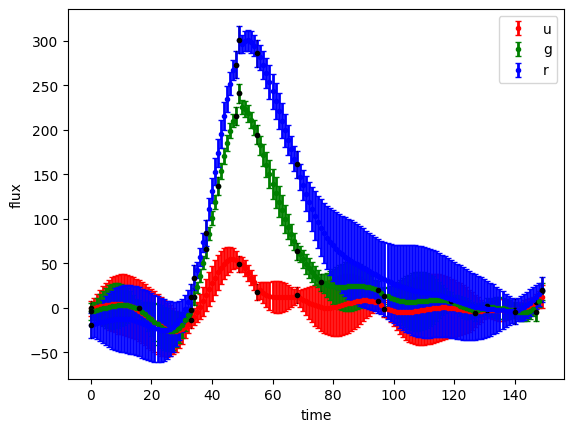

In [60]:
for i in range(3):
    mjd_ = np.linspace(0,149, 150)
    flux_ = selected_data_array[sample, :, i]
    flux_err_ = selected_data_array[sample, :, i+3]
    print(flux_.shape, flux_err_.shape)
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt_1[i], elinewidth=2, capsize=2,label=label[i])
    plt.errorbar(x=data[sample][0][i], y=data[sample][1][i], yerr=data[sample][2][i], fmt=".k", elinewidth=0.2, capsize=0.2)
    #plt.fill_between(x_pred_, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color=color[band], alpha=0.5)
    plt.legend()
    #plt.xlim(min(mjd),max(mjd))
    plt.xlabel("time")
    plt.ylabel("flux")

In [ ]:
np.savez('template.npz', data = selected_data_array)